In [1]:
import numpy
import random

class Bandit:
  DEFAULT_MEANS = numpy.array([0.3,0.6])
  def __init__(self, means):
    self.means = means
    self.t = 0
    self.T = numpy.zeros(self.arms())
    self.S = numpy.zeros(self.arms())

  def rounds(self):
    return self.t

  def arms(self):
    return len(self.means)

  def regret(self):
    subopt = numpy.max(self.means) - self.means
    return numpy.dot(subopt, self.T)

  def play(self, a):
    reward = numpy.random.binomial(1, self.means[a])
    self.T[a]+=1
    self.t+=1
    self.S[a]+=reward
    return reward

  def summary(self):
    print("------------------------------")
    print("number of arms: " + str(self.arms()))
    for a in range(self.arms()):
      print("Arm " + str(a) + ": Played " + str(self.T[a]) + " times with average reward " + str(self.S[a] / self.T[a]))
    print("------------------------------")


In [2]:
class TS():
  def __init__(self, bandit):
    self.bandit = bandit
    self.sample = numpy.zeros(bandit.arms())

  def act(self):
    self.sample = numpy.zeros(self.bandit.arms())
    for i in range(self.bandit.arms()):
      a = self.bandit.S[i] + 1
      b = self.bandit.T[i] - self.bandit.S[i] + 1
      self.sample[i] = numpy.random.beta(a, b)
    self.bandit.play(numpy.argmax(self.sample))

In [3]:
class UCB():
  def __init__(self, bandit):
    self.bandit = bandit
  
  def idx(self):
    return self.bandit.S / self.bandit.T + numpy.sqrt(0.5 / self.bandit.T * numpy.log(self.bandit.rounds() + 1.0))
  
  def act(self):
    if self.bandit.rounds() < self.bandit.arms():
      self.bandit.play(self.bandit.rounds())
      return
    ucb = self.idx()
    self.bandit.play(numpy.argmax(ucb)) 

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rc

# Plot 1

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of ticklabels (3).

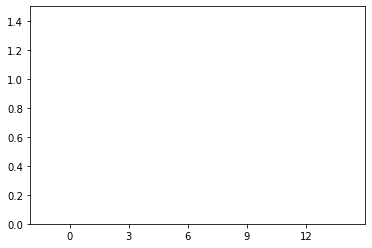

In [5]:
ban = Bandit([0.7, 0.6, 0.5, 0.4, 0.3])
ucb = UCB(ban)

k = ban.arms()
for i in range(k):
  ucb.act()

fig = plt.figure()
ax = plt.axes(xlim=(-2, 15), ylim=(0, 1.5))
x_labels = ['Arm 1', 'Arm 2', 'Arm 3']

y = ucb.idx()

n = len(y)
width = 3
x = np.arange(0, n * width, width)
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.bar(x, y, label='UCB', width=1)
ax.bar(x + 0.5, ban.means, color='red', label='True mean', width=0.5)
ax.bar(x, ban.S / ban.T, color='green', label='Empirical mean', width=0.5)


ax.legend()

def init():
  pass

def animate(i):
  for b in ax.containers:
    b.remove()
  ucb.act()
  y = ucb.idx()
  ax.bar(x, y, label='UCB', color='blue', width=1)
  ax.bar(x + 0.5, ban.means, color='red', label='True mean', width=0.5)
  ax.bar(x, ban.S / ban.T, color='green', label='Empirical mean', width=0.5)
  ax.set_xticklabels(ban.T)
  plt.title("Rounds: " + str(ban.rounds()) + "        Regret: " + str(ban.regret()))

anim = FuncAnimation(fig, animate, init_func=init,frames=200,interval=20,blit=False)

In [ ]:
rc('animation', html='jshtml')
anim

# Plot 2

In [ ]:
ban = Bandit([0.7, 0.6, 0.5, 0.4, 0.3])
ucb = UCB(ban)

k = ban.arms()
for i in range(k):
  ucb.act()

fig = plt.figure()
ax = plt.axes(xlim=(0, 0.48), ylim=(0, 20))


n = 250

Deltas = np.arange(0.0, 0.48, 0.02)
regrets = np.zeros(len(Deltas))


def init():
  pass

def animate(i):
  ax.clear()

  for j in range(len(Deltas)):
    ban = Bandit([0.5, 0.5-Deltas[j]])
    ucb = UCB(ban)
    for t in range(n):
      ucb.act()
    regrets[j]+=ban.regret()
  ax.plot(Deltas, regrets / (i+1.0))
  plt.title("Average regret after " + str(i) + " iterations")
  plt.xlabel("Delta")
  plt.ylabel("Regret")


anim = FuncAnimation(fig, animate, init_func=init,frames=200,interval=1,blit=False)

In [ ]:
rc('animation', html='jshtml')
anim

# Plot 3

In [ ]:
ban = Bandit([0.7, 0.6, 0.5, 0.4, 0.3])
ts = TS(ban)

k = ban.arms()

fig = plt.figure()
ax = plt.axes(xlim=(-2, 15), ylim=(0, 1.5))
x_labels = ['Arm 1', 'Arm 2', 'Arm 3']

y = ts.sample

n = len(y)
width = 3
x = np.arange(0, n * width, width)
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.bar(x, y, color='blue', label='Sampled mean', width=0.33)
ax.bar(x + 0.33, ban.means, color='red', label='True mean', width=0.33)
ax.bar(x + 0.66, ban.S / ban.T, color='green', label='Empirical mean', width=0.33)


ax.legend()

def init():
  pass

def animate(i):
  for b in ax.containers:
    b.remove()
  ts.act()
  y = ts.sample
  #ax.bar(x, y, label='Sampled mean', width=1)
  #ax.bar(x + 0.5, ban.means, color='red', label='True mean', width=0.5)
  #ax.bar(x, ban.S / ban.T, color='green', label='Empirical mean', width=0.5)
  ax.bar(x, y, label='Sampled mean', width=0.33)
  ax.bar(x + 0.33, ban.means, color='red', label='True mean', width=0.33)
  ax.bar(x + 0.66, ban.S / ban.T, color='green', label='Empirical mean', width=0.33)

  ax.set_xticklabels(ban.T)
  plt.title("Rounds: " + str(ban.rounds()) + "        Regret: " + str(ban.regret()))

anim = FuncAnimation(fig, animate, init_func=init,frames=200,interval=20,blit=False)

In [ ]:
rc('animation', html='jshtml')
anim

# Plot 4

In [ ]:
ban = Bandit([0.7, 0.6, 0.5, 0.4, 0.3])
ucb = UCB(ban)

k = ban.arms()
for i in range(k):
  ucb.act()

fig = plt.figure()
ax = plt.axes(xlim=(0, 0.48), ylim=(0, 20))


n = 1000

regrets = []
regrets_ts = []

def init():
  pass

def animate(i):
  ax.clear()

  ban = Bandit([0.5, 0.4])
  ucb = UCB(ban)
  for t in range(n):
    ucb.act()
  regrets.append(ban.regret())

  ban = Bandit([0.5, 0.4])
  ts = TS(ban)
  for t in range(n):
    ts.act()
  regrets_ts.append(ban.regret())
  ax.hist(regrets, bins=np.arange(0, 100, 2), weights=np.ones(len(regrets)) / len(regrets), alpha = 0.3, label='UCB')
  ax.hist(regrets_ts, bins=np.arange(0, 100, 2), weights=np.ones(len(regrets)) / len(regrets), color='black', alpha = 0.3, label = 'TS')
  plt.xlim([0,100])
  plt.title("Histogram of regret from " + str(i) + " iterations")
  plt.xlabel("Regret")
  plt.ylabel("Frequency")
  ax.legend()


anim = FuncAnimation(fig, animate, init_func=init,frames=200,interval=1,blit=False)

In [ ]:
rc('animation', html='jshtml')
anim